In [30]:
from sklearn import datasets
from skimpy import skim
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import tree

iris = datasets.load_iris(as_frame= True)

In [20]:
skim(iris.data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 150    │ │ float64     │ 4     │                                                          │
│ │ Number of columns │ 4      │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name             ┃ NA   ┃ NA %   ┃ mean   ┃ sd     ┃ p0    ┃ p25   ┃ p50   ┃ p75  ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ sepal length (cm)       │    0 │      0 │    5.8 │   0.83 │   4.3 │   5.1 │   5.8 │  6.4 │   7.9 │ ▃▇▇▇▅▂  │  │
│ │ sepal width (cm)        │    0 │      0 │    3.1 │   0.44 │     2 │   2.8 │     3 │  3.3 │   4.4 │ ▁▇▇▇▂▁  │  │
│ │ petal length (cm)       │    0 │      0 │    3.8 │    1.8 │     1 │   1.6 │   4.3 │  5.1 │   6.9 │ ▇ ▂▇▆▂  │  │
│ │ petal width (cm)        │    0 │      0 │    1.2 │   0.76 │   0.1 │   0.3 │   1.3 │  1.8 │   2.5 │ ▇ ▂▆▅▃  │  │
│ └─────────────────────────┴──────┴────────┴────────┴────────┴───────┴───────┴───────┴──────┴───────┴─────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [24]:
X, X_test, y, y_test = train_test_split(iris.data, iris.target, test_size=0.2)

In [25]:
# Train Decision Tree
# # train
dtree = DecisionTreeClassifier()
dtree.fit(X, y)


DecisionTreeClassifier()

In [26]:
## Score on test set

dtree.score(X_test, y_test)

0.9333333333333333

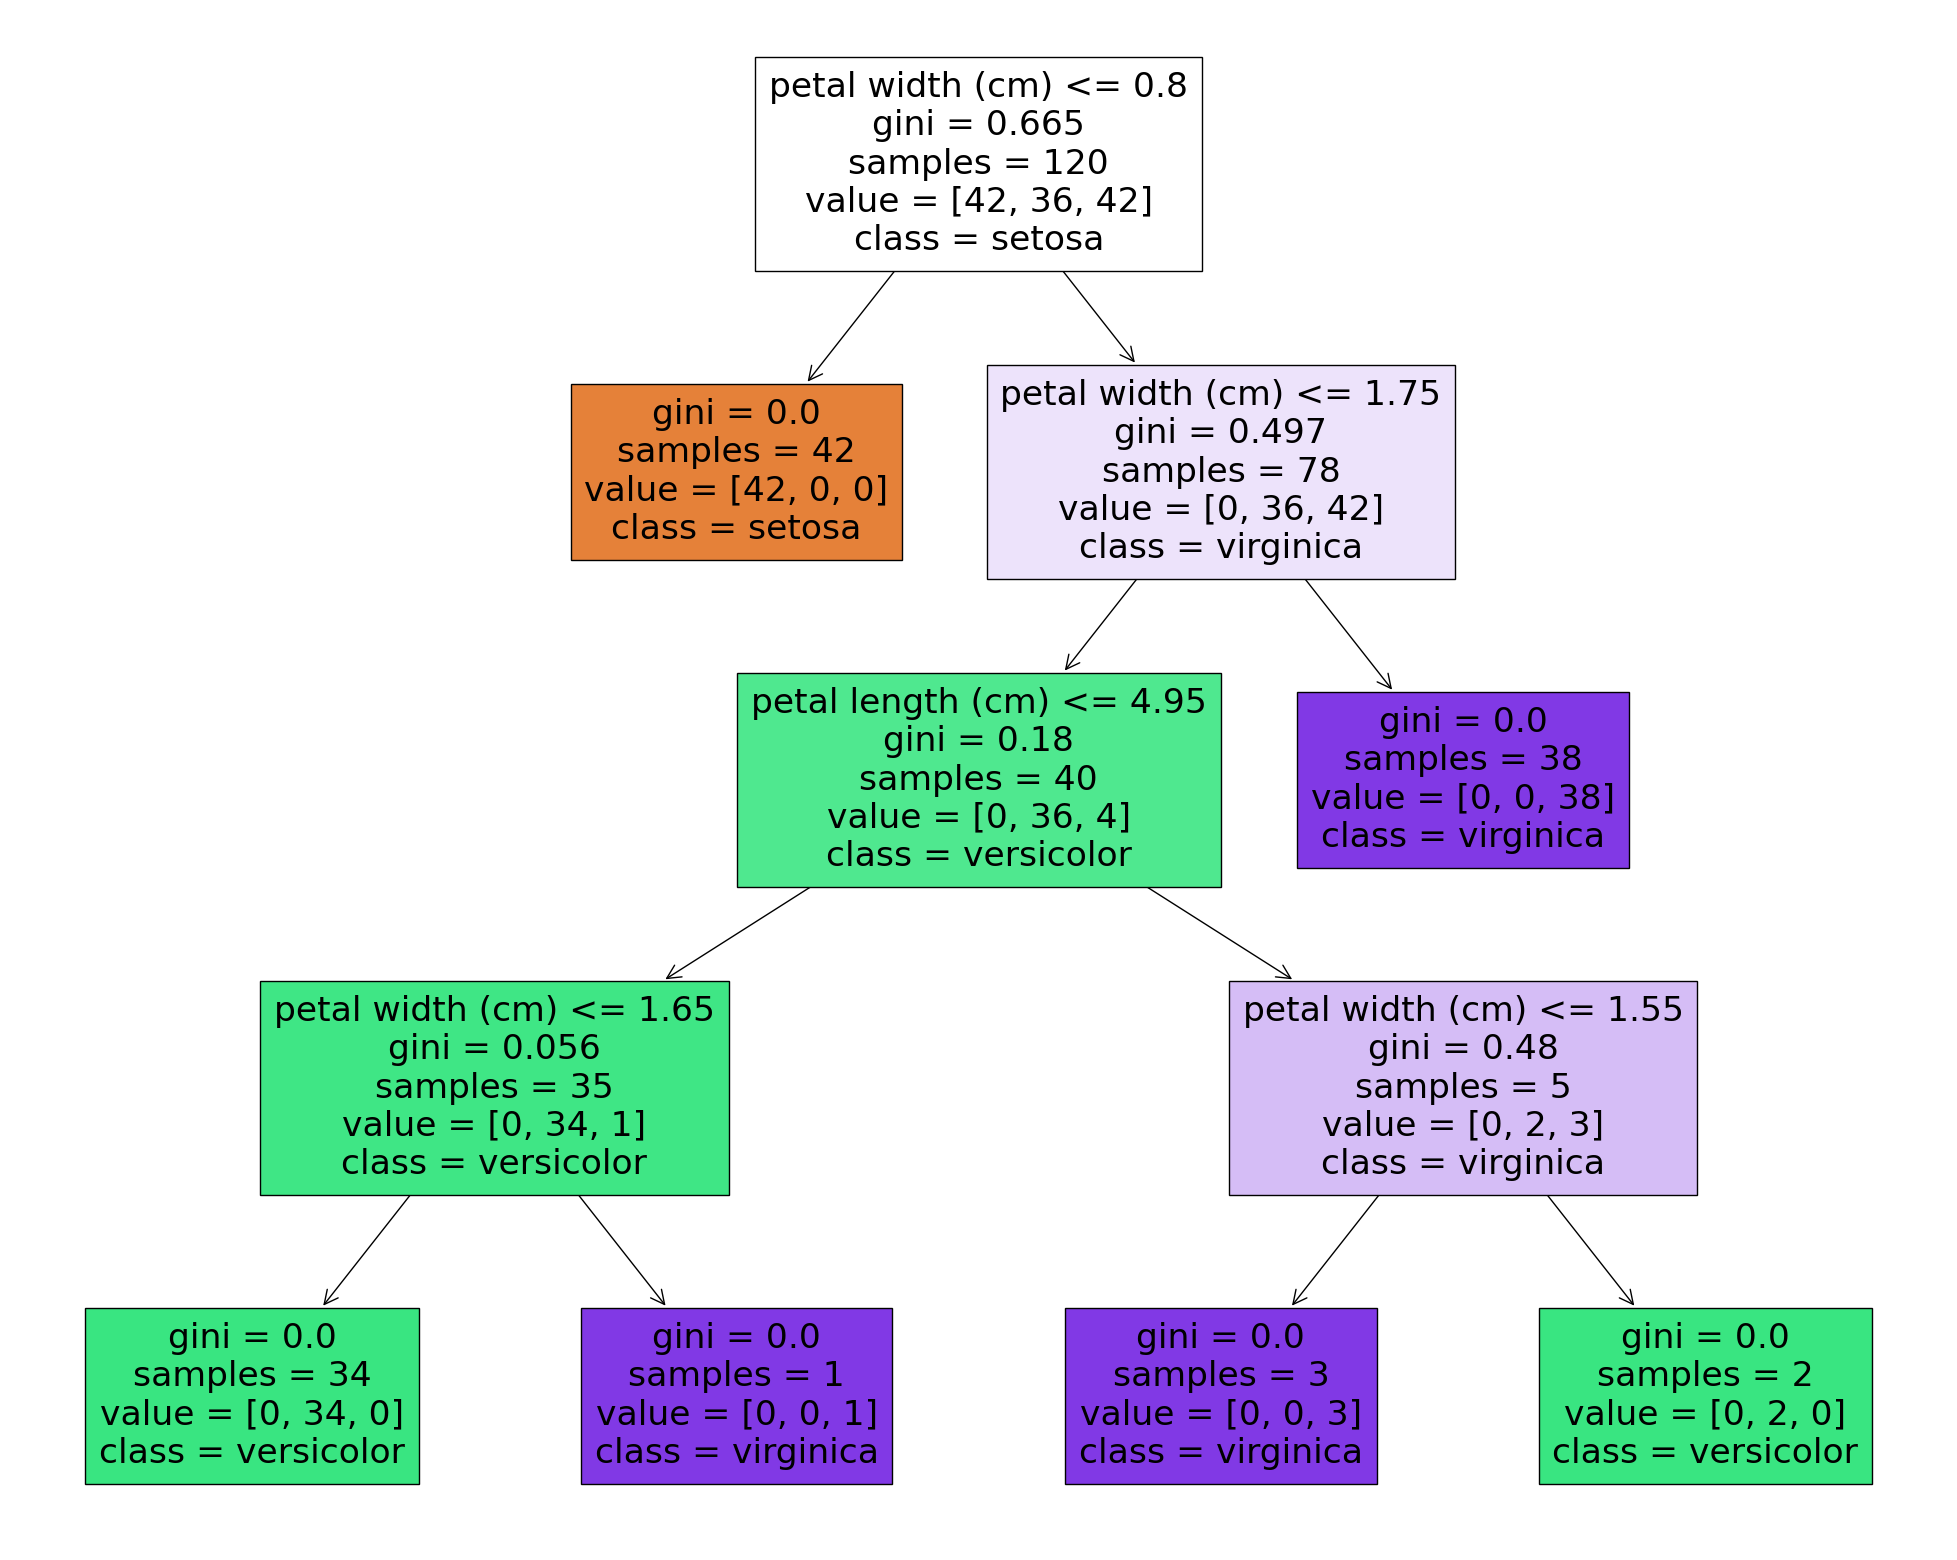

In [36]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtree, 
                   feature_names=list(iris.feature_names),  
                   class_names=list(iris.target_names),
                   filled=True)

In [37]:
# Train Random Forest model

rfmodel = RandomForestClassifier(n_estimators = 100, max_features=0.3, ccp_alpha=0.003)
rfmodel.fit(X, y)

RandomForestClassifier(ccp_alpha=0.003, max_features=0.3)

## Measure training and test accuracy

In [38]:
rfmodel.score(X, y), rfmodel.score(X_test, y_test)

(1.0, 0.9666666666666667)

# New rf model

In [39]:
y1 = rfmodel.predict(X) # proxy labels

In [41]:
## Train Decision tree on proxy labels

# train
dtree = DecisionTreeClassifier()
dtree.fit(X, y1)


DecisionTreeClassifier()

In [42]:
## Predicion accuracy of new decision tree model

y2 = dtree.predict(X) # this should overfit

In [44]:
dtree.score(X_test, y_test)

0.9333333333333333

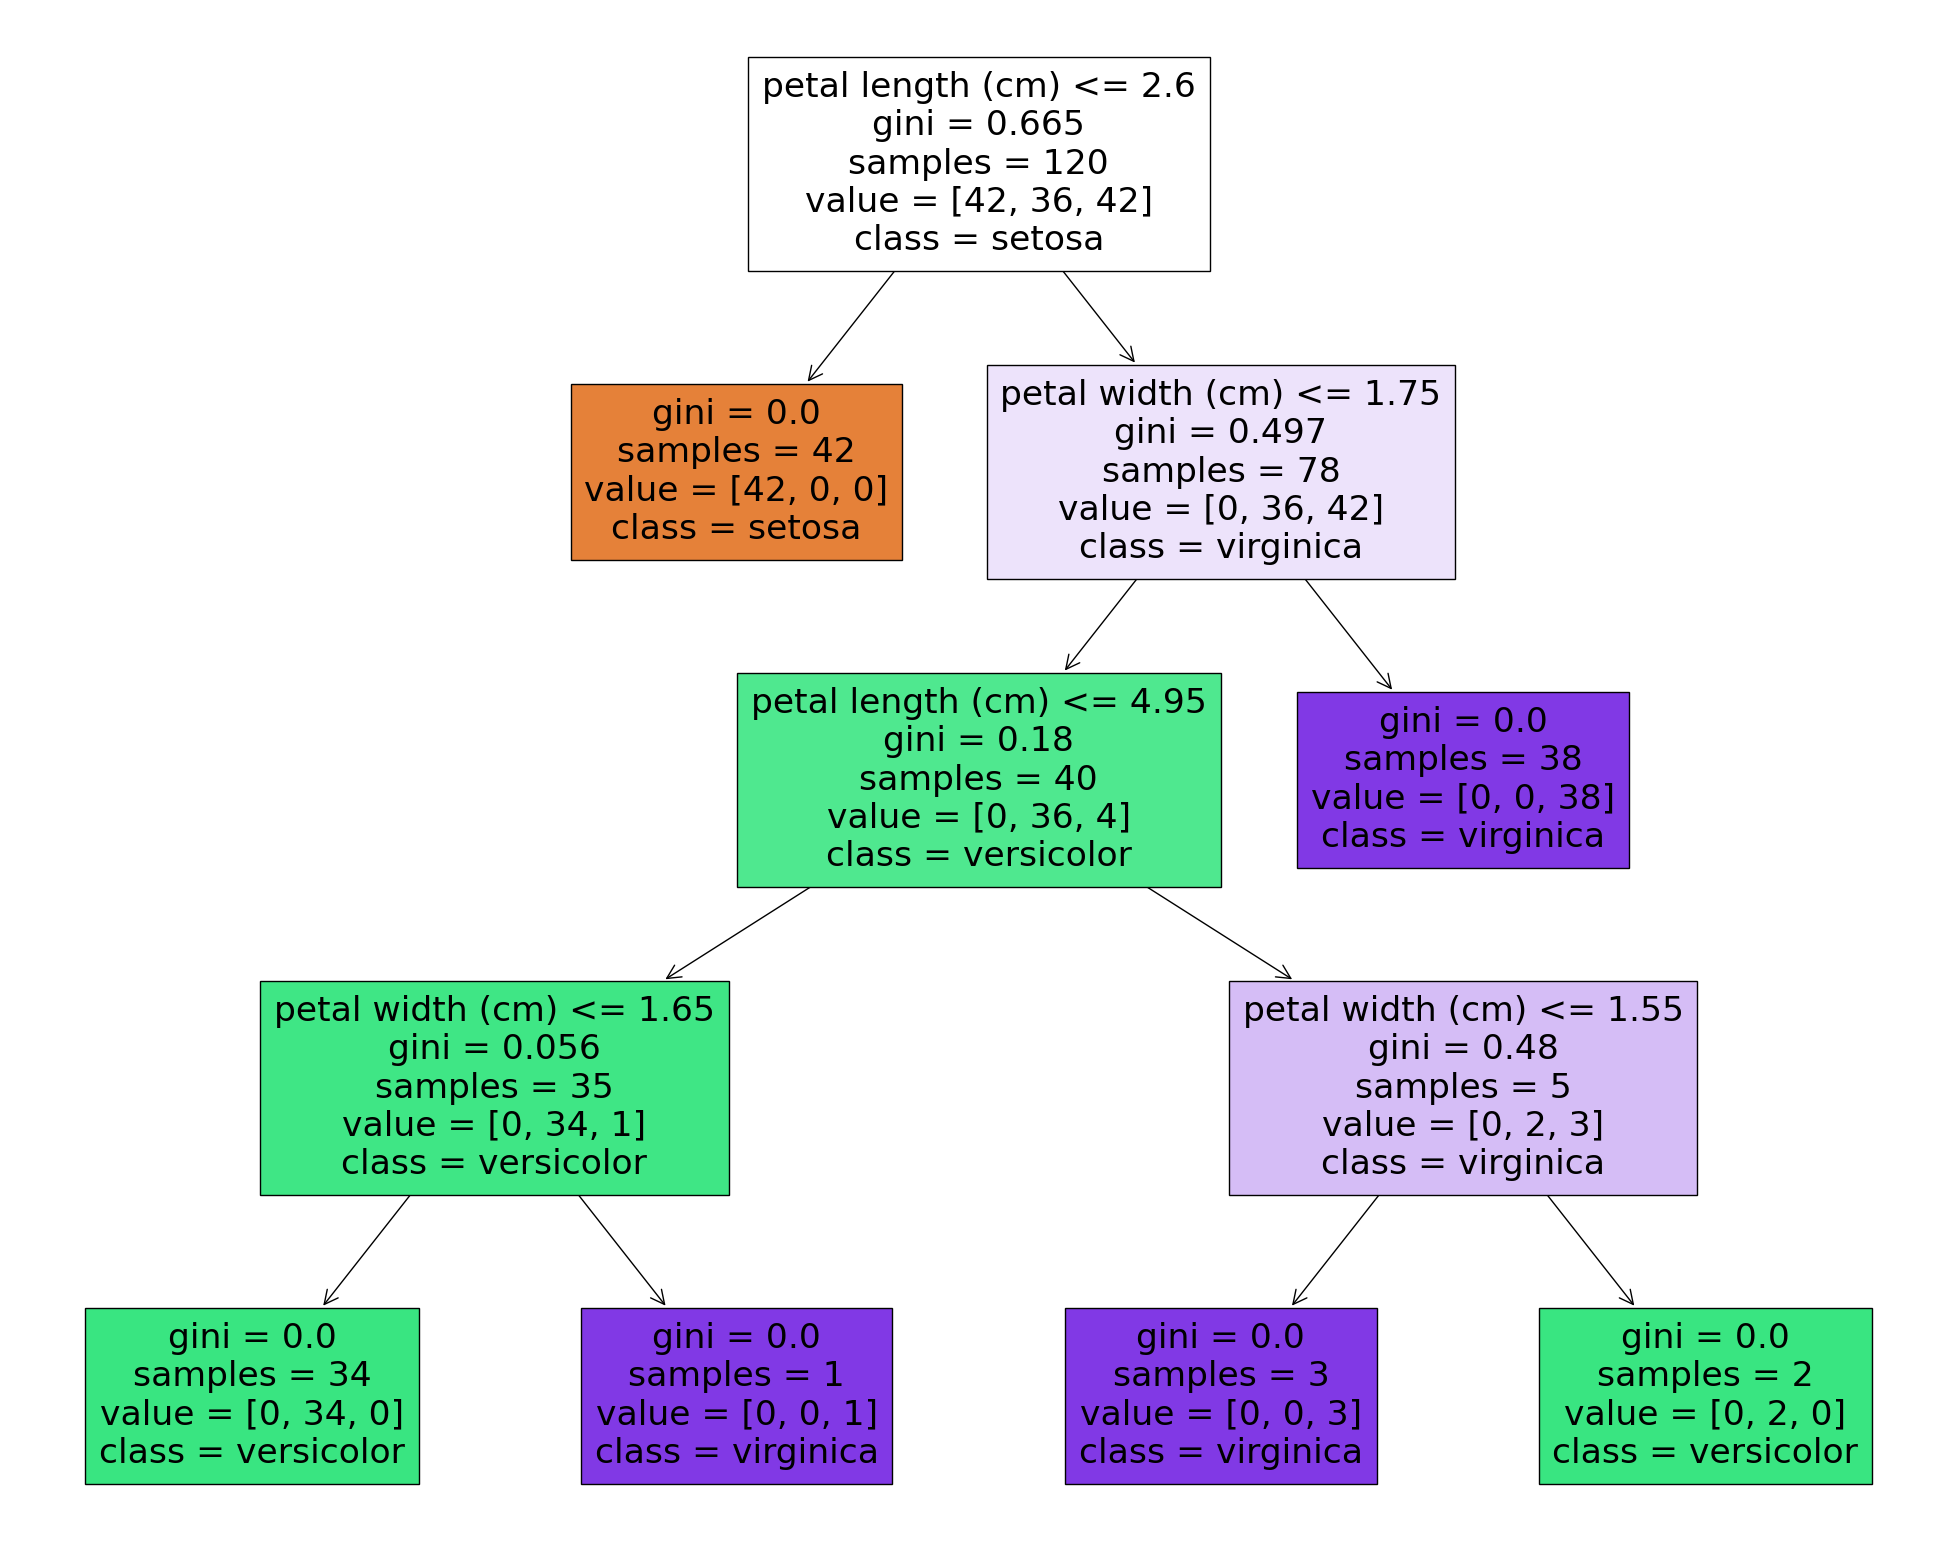

In [45]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtree, 
                   feature_names=list(iris.feature_names),  
                   class_names=list(iris.target_names),
                   filled=True)

In [46]:
import interactive_decision_tree as idt ## module in the repository

In [47]:
idt.create_tree(tree_model = dtree, 
                X = iris.data, 
                target_names=iris.target_names, 
                save_path = "./iris_tree.html")

Saved to ./iris_tree.html


In [48]:
idt.create_sankey(tree_model = dtree, 
                  X = iris.data, 
                  target_names=iris.target_names, 
                  save_path = "./iris_sankey.html")

Saved to ./iris_sankey.html
